In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

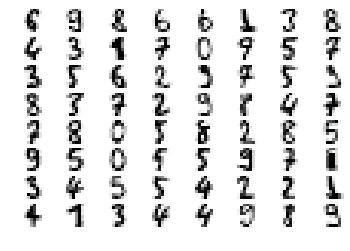

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.50468 stdev: 0.16923
Best fitness: 0.95077 - size: (2, 13) - species 4 - id 184
Average adjusted fitness: 0.503
Mean genetic distance 2.902, standard deviation 0.481
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 3.507 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59009 stdev: 0.18218
Best fitness: 0.98154 - size: (2, 13) - species 1 - id 342
Average adjusted fitness: 0.532
Mean genetic distance 2.971, standard deviation 0.513
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 3.104 sec (3.305 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63535 stdev: 0.20852
Best fitness: 0.99385 - size: (3, 15) - species 11 - id 489
Average adjusted fitness: 0.505
Mean genetic distance 2.939, standard deviation 0.509
Population of 197 members in 27 species
Total extincti

Population's average fitness: 0.76257 stdev: 0.19418
Best fitness: 0.99068 - size: (5, 18) - species 4 - id 1232
Average adjusted fitness: 0.654
Mean genetic distance 3.120, standard deviation 0.491
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.546 sec (5.097 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.75595 stdev: 0.20177
Best fitness: 0.99068 - size: (4, 19) - species 34 - id 1118
Average adjusted fitness: 0.671
Mean genetic distance 3.097, standard deviation 0.489
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 4.868 sec (5.071 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74937 stdev: 0.20344
Best fitness: 0.99068 - size: (4, 19) - species 34 - id 1118
Average adjusted fitness: 0.610
Mean genetic distance 3.088, standard deviation 0.495
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 5.906 sec (5.155 average)

 ****** Ru

Population's average fitness: 0.76235 stdev: 0.22482
Best fitness: 0.99689 - size: (10, 32) - species 2 - id 3950
Average adjusted fitness: 0.658
Mean genetic distance 3.249, standard deviation 0.503
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 4.781 sec (4.611 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.78571 stdev: 0.19598
Best fitness: 0.99689 - size: (10, 32) - species 2 - id 3950
Average adjusted fitness: 0.561
Mean genetic distance 3.309, standard deviation 0.516
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 5.011 sec (4.669 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.76836 stdev: 0.21599
Best fitness: 0.99689 - size: (10, 32) - species 2 - id 3950
Average adjusted fitness: 0.730
Mean genetic distance 3.275, standard deviation 0.528
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 4.952 sec (4.721 average)

 ******

Population's average fitness: 0.70150 stdev: 0.20491
Best fitness: 0.97833 - size: (2, 13) - species 1 - id 529
Average adjusted fitness: 0.631
Mean genetic distance 3.040, standard deviation 0.505
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 3.838 sec (3.702 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72226 stdev: 0.20479
Best fitness: 0.98762 - size: (5, 18) - species 3 - id 1369
Average adjusted fitness: 0.657
Mean genetic distance 3.041, standard deviation 0.493
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 3.989 sec (3.730 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73627 stdev: 0.21126
Best fitness: 0.98762 - size: (5, 18) - species 3 - id 1369
Average adjusted fitness: 0.668
Mean genetic distance 3.024, standard deviation 0.489
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 3.917 sec (3.835 average)

 ****** Runn

Population's average fitness: 0.77525 stdev: 0.19149
Best fitness: 0.99381 - size: (10, 29) - species 19 - id 3413
Average adjusted fitness: 0.513
Mean genetic distance 3.203, standard deviation 0.538
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 4.357 sec (4.470 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.78274 stdev: 0.18644
Best fitness: 0.99381 - size: (10, 29) - species 19 - id 3413
Average adjusted fitness: 0.453
Mean genetic distance 3.206, standard deviation 0.533
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.209 sec (4.426 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.78157 stdev: 0.19154
Best fitness: 0.99381 - size: (10, 29) - species 19 - id 3413
Average adjusted fitness: 0.653
Mean genetic distance 3.173, standard deviation 0.550
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 4.619 sec (4.459 average)

 ***

Population's average fitness: 0.81549 stdev: 0.19180
Best fitness: 0.99690 - size: (7, 24) - species 44 - id 8473
Average adjusted fitness: 0.760
Mean genetic distance 3.120, standard deviation 0.602
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 4.485 sec (4.522 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.80186 stdev: 0.18793
Best fitness: 0.99690 - size: (7, 24) - species 44 - id 8473
Average adjusted fitness: 0.386
Mean genetic distance 3.103, standard deviation 0.587
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.570 sec (4.557 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.81430 stdev: 0.19039
Best fitness: 0.99690 - size: (7, 24) - species 44 - id 8473
Average adjusted fitness: 0.622
Mean genetic distance 3.115, standard deviation 0.570
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 4.501 sec (4.534 average)

 ******

Population's average fitness: 0.75250 stdev: 0.18708
Best fitness: 0.98466 - size: (5, 18) - species 23 - id 1767
Average adjusted fitness: 0.540
Mean genetic distance 3.182, standard deviation 0.478
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 4.037 sec (3.841 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.77323 stdev: 0.17967
Best fitness: 0.99693 - size: (7, 21) - species 16 - id 2138
Average adjusted fitness: 0.502
Mean genetic distance 3.186, standard deviation 0.475
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 4.061 sec (3.888 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.76141 stdev: 0.18299
Best fitness: 0.99693 - size: (7, 21) - species 16 - id 2138
Average adjusted fitness: 0.586
Mean genetic distance 3.204, standard deviation 0.489
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 4.088 sec (3.933 average)

 ******

Mean genetic distance 3.247, standard deviation 0.467
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 4.175 sec (3.926 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.73640 stdev: 0.20688
Best fitness: 0.99077 - size: (5, 19) - species 6 - id 1797
Average adjusted fitness: 0.692
Mean genetic distance 3.265, standard deviation 0.460
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 4.048 sec (4.009 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74305 stdev: 0.20736
Best fitness: 0.99077 - size: (5, 19) - species 6 - id 1797
Average adjusted fitness: 0.683
Mean genetic distance 3.277, standard deviation 0.464
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 4.225 sec (4.055 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.76753 stdev: 0.19193
Best fitness: 0.99077 - size: (5, 19) - species 6 - id 1797
Ave

Mean genetic distance 3.353, standard deviation 0.534
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 4.246 sec (4.225 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.80708 stdev: 0.19908
Best fitness: 0.99692 - size: (7, 21) - species 48 - id 4599
Average adjusted fitness: 0.499
Mean genetic distance 3.375, standard deviation 0.536
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 4.130 sec (4.220 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.79118 stdev: 0.20490
Best fitness: 0.99692 - size: (7, 21) - species 48 - id 4599
Average adjusted fitness: 0.662
Mean genetic distance 3.354, standard deviation 0.536
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 4.271 sec (4.241 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.79557 stdev: 0.19331
Best fitness: 0.99692 - size: (7, 21) - species 48 - id 4599


Population's average fitness: 0.73888 stdev: 0.20739
Best fitness: 0.99373 - size: (5, 22) - species 25 - id 1546
Average adjusted fitness: 0.673
Mean genetic distance 3.198, standard deviation 0.472
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 3.743 sec (3.470 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.73918 stdev: 0.20374
Best fitness: 0.99373 - size: (5, 22) - species 25 - id 1546
Average adjusted fitness: 0.619
Mean genetic distance 3.209, standard deviation 0.478
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 3.818 sec (3.553 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.77081 stdev: 0.19734
Best fitness: 0.99687 - size: (5, 16) - species 35 - id 1859
Average adjusted fitness: 0.401
Mean genetic distance 3.209, standard deviation 0.486
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 3.719 sec (3.600 average)

 ******

Mean genetic distance 3.027, standard deviation 0.459
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 3.153 sec (2.950 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60135 stdev: 0.14636
Best fitness: 0.90402 - size: (3, 16) - species 17 - id 504
Average adjusted fitness: 0.430
Mean genetic distance 3.008, standard deviation 0.459
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 3.141 sec (3.013 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62498 stdev: 0.14692
Best fitness: 0.90402 - size: (3, 16) - species 17 - id 504
Average adjusted fitness: 0.439
Mean genetic distance 2.973, standard deviation 0.469
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 3.910 sec (3.237 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65114 stdev: 0.14751
Best fitness: 0.93498 - size: (3, 15) - species 36 - id 789
Averag

Mean genetic distance 3.087, standard deviation 0.477
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 3.640 sec (3.740 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.72541 stdev: 0.15429
Best fitness: 0.94427 - size: (5, 17) - species 24 - id 2806
Average adjusted fitness: 0.458
Mean genetic distance 3.044, standard deviation 0.467
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 3.790 sec (3.742 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.72612 stdev: 0.16407
Best fitness: 0.94427 - size: (5, 17) - species 24 - id 2806
Average adjusted fitness: 0.461
Mean genetic distance 3.047, standard deviation 0.471
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 3.902 sec (3.764 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.71232 stdev: 0.16088
Best fitness: 0.94427 - size: (5, 17) - species 24 - id 2806


Mean genetic distance 3.203, standard deviation 0.561
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.388 sec (4.279 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.72493 stdev: 0.16216
Best fitness: 0.96594 - size: (11, 29) - species 21 - id 6448
Average adjusted fitness: 0.361
Mean genetic distance 3.196, standard deviation 0.551
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 4.423 sec (4.325 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.72131 stdev: 0.16573
Best fitness: 0.96594 - size: (11, 29) - species 21 - id 6448
Average adjusted fitness: 0.341
Mean genetic distance 3.169, standard deviation 0.548
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.545 sec (4.369 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.73132 stdev: 0.15908
Best fitness: 0.96594 - size: (11, 29) - species 21 - id 64

Mean genetic distance 3.238, standard deviation 0.471
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 4.064 sec (3.482 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67415 stdev: 0.15306
Best fitness: 0.95122 - size: (6, 20) - species 27 - id 1064
Average adjusted fitness: 0.472
Mean genetic distance 3.245, standard deviation 0.476
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 4.793 sec (3.646 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67223 stdev: 0.16762
Best fitness: 0.96951 - size: (5, 17) - species 6 - id 1274
Average adjusted fitness: 0.565
Mean genetic distance 3.245, standard deviation 0.468
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 4.646 sec (3.757 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70464 stdev: 0.16153
Best fitness: 0.97561 - size: (5, 18) - species 25 - id 1428
Aver

Mean genetic distance 3.278, standard deviation 0.510
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 4.287 sec (4.360 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.74796 stdev: 0.15796
Best fitness: 0.98780 - size: (5, 19) - species 25 - id 2118
Average adjusted fitness: 0.357
Mean genetic distance 3.256, standard deviation 0.521
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 4.163 sec (4.355 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.73826 stdev: 0.16399
Best fitness: 0.98780 - size: (5, 19) - species 25 - id 2118
Average adjusted fitness: 0.516
Mean genetic distance 3.251, standard deviation 0.526
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.267 sec (4.343 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.74579 stdev: 0.17119
Best fitness: 0.98780 - size: (5, 19) - species 25 - id 2118


Mean genetic distance 3.307, standard deviation 0.548
Population of 192 members in 18 species
Total extinctions: 0
Generation time: 4.822 sec (4.728 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.75418 stdev: 0.17778
Best fitness: 0.99390 - size: (7, 23) - species 25 - id 4535
Average adjusted fitness: 0.552
Mean genetic distance 3.296, standard deviation 0.534
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.905 sec (4.736 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.74966 stdev: 0.17637
Best fitness: 0.99390 - size: (7, 23) - species 25 - id 4535
Average adjusted fitness: 0.411
Mean genetic distance 3.301, standard deviation 0.539
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 5.242 sec (4.794 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.75846 stdev: 0.17749
Best fitness: 0.99390 - size: (7, 23) - species 25 - id 4535


Mean genetic distance 3.127, standard deviation 0.526
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 3.628 sec (3.578 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69773 stdev: 0.15452
Best fitness: 0.95370 - size: (5, 16) - species 24 - id 1618
Average adjusted fitness: 0.382
Mean genetic distance 3.119, standard deviation 0.515
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 3.797 sec (3.625 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70600 stdev: 0.16403
Best fitness: 0.95370 - size: (5, 16) - species 24 - id 1618
Average adjusted fitness: 0.462
Mean genetic distance 3.138, standard deviation 0.511
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 3.891 sec (3.691 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71159 stdev: 0.15317
Best fitness: 0.95370 - size: (5, 16) - species 24 - id 1618


Mean genetic distance 3.275, standard deviation 0.521
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 4.296 sec (4.220 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.70472 stdev: 0.15965
Best fitness: 0.96296 - size: (5, 17) - species 24 - id 5143
Average adjusted fitness: 0.412
Mean genetic distance 3.274, standard deviation 0.520
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 4.206 sec (4.210 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.70634 stdev: 0.15647
Best fitness: 0.96296 - size: (5, 17) - species 24 - id 5143
Average adjusted fitness: 0.313
Mean genetic distance 3.278, standard deviation 0.533
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 4.268 sec (4.236 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.70674 stdev: 0.15635
Best fitness: 0.96296 - size: (5, 17) - species 24 - id 5143


Mean genetic distance 3.317, standard deviation 0.602
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 4.927 sec (4.731 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.70323 stdev: 0.16193
Best fitness: 0.96605 - size: (6, 19) - species 24 - id 8367
Average adjusted fitness: 0.399
Mean genetic distance 3.319, standard deviation 0.600
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 5.015 sec (4.770 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.72514 stdev: 0.15843
Best fitness: 0.96605 - size: (6, 19) - species 24 - id 8367
Average adjusted fitness: 0.337
Mean genetic distance 3.298, standard deviation 0.599
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 4.957 sec (4.813 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.71952 stdev: 0.15653
Best fitness: 0.96605 - size: (6, 19) - species 24 - id 8367


Mean genetic distance 3.169, standard deviation 0.553
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 3.910 sec (3.749 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74349 stdev: 0.17895
Best fitness: 0.98471 - size: (5, 18) - species 33 - id 1802
Average adjusted fitness: 0.576
Mean genetic distance 3.177, standard deviation 0.541
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 3.724 sec (3.769 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74459 stdev: 0.17909
Best fitness: 0.98471 - size: (5, 18) - species 33 - id 1802
Average adjusted fitness: 0.581
Mean genetic distance 3.177, standard deviation 0.537
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 4.054 sec (3.808 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75443 stdev: 0.16397
Best fitness: 0.98471 - size: (5, 18) - species 33 - id 1802


Mean genetic distance 3.170, standard deviation 0.580
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.442 sec (4.374 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.74246 stdev: 0.17384
Best fitness: 0.99083 - size: (7, 23) - species 33 - id 4733
Average adjusted fitness: 0.415
Mean genetic distance 3.157, standard deviation 0.584
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 4.441 sec (4.392 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.73339 stdev: 0.18199
Best fitness: 0.99083 - size: (7, 23) - species 33 - id 4733
Average adjusted fitness: 0.491
Mean genetic distance 3.111, standard deviation 0.589
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 4.398 sec (4.399 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.72528 stdev: 0.18524
Best fitness: 0.99083 - size: (7, 23) - species 33 - id 4733


Mean genetic distance 3.101, standard deviation 0.543
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 5.254 sec (5.035 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.78667 stdev: 0.17247
Best fitness: 0.99083 - size: (7, 23) - species 33 - id 4733
Average adjusted fitness: 0.398
Mean genetic distance 3.063, standard deviation 0.547
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 5.120 sec (5.059 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.75647 stdev: 0.19613
Best fitness: 0.99083 - size: (7, 23) - species 33 - id 4733
Average adjusted fitness: 0.688
Mean genetic distance 3.032, standard deviation 0.552
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.892 sec (5.048 average)
Class1:1 #class1:163
Class2:6 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.50995 stdev: 0.14049
Best fitness: 0.9018

Mean genetic distance 3.204, standard deviation 0.480
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 4.103 sec (4.340 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.76914 stdev: 0.17478
Best fitness: 0.98773 - size: (5, 24) - species 43 - id 2977
Average adjusted fitness: 0.383
Mean genetic distance 3.207, standard deviation 0.481
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 4.137 sec (4.198 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.77217 stdev: 0.17278
Best fitness: 0.98773 - size: (5, 24) - species 43 - id 2977
Average adjusted fitness: 0.424
Mean genetic distance 3.232, standard deviation 0.475
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 4.302 sec (4.222 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.73784 stdev: 0.19666
Best fitness: 0.98773 - size: (5, 24) - species 43 - id 2977


Mean genetic distance 3.233, standard deviation 0.573
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 4.893 sec (4.668 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.76560 stdev: 0.18150
Best fitness: 0.99387 - size: (9, 24) - species 10 - id 6338
Average adjusted fitness: 0.426
Mean genetic distance 3.233, standard deviation 0.577
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.735 sec (4.688 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.76633 stdev: 0.18051
Best fitness: 0.99387 - size: (9, 24) - species 10 - id 6338
Average adjusted fitness: 0.401
Mean genetic distance 3.240, standard deviation 0.568
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 4.999 sec (4.721 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.73933 stdev: 0.20350
Best fitness: 0.99387 - size: (9, 24) - species 10 - id 6338


Mean genetic distance 3.073, standard deviation 0.484
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 3.205 sec (3.008 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63390 stdev: 0.15391
Best fitness: 0.95356 - size: (4, 17) - species 18 - id 493
Average adjusted fitness: 0.477
Mean genetic distance 3.088, standard deviation 0.482
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 3.415 sec (3.110 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65061 stdev: 0.15320
Best fitness: 0.95356 - size: (4, 17) - species 18 - id 493
Average adjusted fitness: 0.453
Mean genetic distance 3.103, standard deviation 0.484
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 3.396 sec (3.167 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67673 stdev: 0.15243
Best fitness: 0.95975 - size: (6, 21) - species 18 - id 965
Averag

Mean genetic distance 3.220, standard deviation 0.492
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 4.076 sec (3.997 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77803 stdev: 0.16808
Best fitness: 0.99690 - size: (7, 21) - species 5 - id 3709
Average adjusted fitness: 0.405
Mean genetic distance 3.229, standard deviation 0.510
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 4.015 sec (4.006 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.75928 stdev: 0.17825
Best fitness: 0.99690 - size: (7, 21) - species 5 - id 3709
Average adjusted fitness: 0.409
Mean genetic distance 3.228, standard deviation 0.511
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 4.239 sec (4.030 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.75372 stdev: 0.18880
Best fitness: 0.99690 - size: (7, 21) - species 5 - id 3709
Ave

Mean genetic distance 3.280, standard deviation 0.583
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 4.428 sec (4.431 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.76512 stdev: 0.17545
Best fitness: 0.99690 - size: (7, 21) - species 5 - id 3709
Average adjusted fitness: 0.496
Mean genetic distance 3.239, standard deviation 0.575
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.421 sec (4.460 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.76788 stdev: 0.17546
Best fitness: 0.99690 - size: (7, 21) - species 5 - id 3709
Average adjusted fitness: 0.466
Mean genetic distance 3.255, standard deviation 0.579
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.415 sec (4.462 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.78023 stdev: 0.17500
Best fitness: 0.99690 - size: (7, 21) - species 5 - id 3709
Ave

Population's average fitness: 0.64539 stdev: 0.12234
Best fitness: 0.89687 - size: (5, 18) - species 36 - id 1087
Average adjusted fitness: 0.348
Mean genetic distance 3.169, standard deviation 0.523
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 3.643 sec (3.292 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64710 stdev: 0.11868
Best fitness: 0.89687 - size: (5, 18) - species 36 - id 1087
Average adjusted fitness: 0.319
Mean genetic distance 3.143, standard deviation 0.511
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 3.511 sec (3.314 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64751 stdev: 0.12502
Best fitness: 0.89687 - size: (5, 18) - species 36 - id 1087
Average adjusted fitness: 0.318
Mean genetic distance 3.156, standard deviation 0.516
Population of 189 members in 38 species
Total extinctions: 0
Generation time: 3.456 sec (3.377 average)

 ****** 

Population's average fitness: 0.68216 stdev: 0.14457
Best fitness: 0.90312 - size: (6, 21) - species 36 - id 2176
Average adjusted fitness: 0.364
Mean genetic distance 3.255, standard deviation 0.546
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.047 sec (3.872 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.67098 stdev: 0.14678
Best fitness: 0.90312 - size: (6, 21) - species 36 - id 2176
Average adjusted fitness: 0.397
Mean genetic distance 3.256, standard deviation 0.539
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.072 sec (3.899 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.65769 stdev: 0.14702
Best fitness: 0.90312 - size: (6, 21) - species 36 - id 2176
Average adjusted fitness: 0.459
Mean genetic distance 3.239, standard deviation 0.547
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 4.139 sec (3.920 average)

 ******

Population's average fitness: 0.67583 stdev: 0.14387
Best fitness: 0.90938 - size: (11, 29) - species 37 - id 8426
Average adjusted fitness: 0.307
Mean genetic distance 3.147, standard deviation 0.567
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 4.800 sec (4.520 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.68812 stdev: 0.14546
Best fitness: 0.90938 - size: (11, 29) - species 37 - id 8426
Average adjusted fitness: 0.355
Mean genetic distance 3.168, standard deviation 0.554
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.889 sec (4.586 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.67831 stdev: 0.15368
Best fitness: 0.90938 - size: (11, 29) - species 37 - id 8426
Average adjusted fitness: 0.471
Mean genetic distance 3.191, standard deviation 0.553
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 4.948 sec (4.656 average)

 ***

Population's average fitness: 0.69845 stdev: 0.15234
Best fitness: 0.95077 - size: (5, 18) - species 16 - id 1589
Average adjusted fitness: 0.364
Mean genetic distance 3.249, standard deviation 0.476
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 3.708 sec (3.661 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69955 stdev: 0.16142
Best fitness: 0.95077 - size: (5, 18) - species 16 - id 1589
Average adjusted fitness: 0.503
Mean genetic distance 3.249, standard deviation 0.475
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 3.928 sec (3.701 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70997 stdev: 0.15194
Best fitness: 0.95077 - size: (5, 18) - species 16 - id 1589
Average adjusted fitness: 0.342
Mean genetic distance 3.230, standard deviation 0.487
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 3.744 sec (3.713 average)

 ******

Population's average fitness: 0.72903 stdev: 0.15948
Best fitness: 0.96000 - size: (9, 24) - species 1 - id 3580
Average adjusted fitness: 0.443
Mean genetic distance 3.299, standard deviation 0.531
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 4.486 sec (4.329 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.72721 stdev: 0.15055
Best fitness: 0.96000 - size: (9, 24) - species 1 - id 3580
Average adjusted fitness: 0.258
Mean genetic distance 3.310, standard deviation 0.538
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 4.268 sec (4.305 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.71305 stdev: 0.16794
Best fitness: 0.96000 - size: (9, 24) - species 1 - id 3580
Average adjusted fitness: 0.431
Mean genetic distance 3.292, standard deviation 0.560
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.214 sec (4.324 average)

 ****** Ru

Population's average fitness: 0.73036 stdev: 0.16180
Best fitness: 0.96308 - size: (9, 25) - species 1 - id 7361
Average adjusted fitness: 0.540
Mean genetic distance 3.276, standard deviation 0.559
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.671 sec (4.756 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.70771 stdev: 0.16925
Best fitness: 0.96308 - size: (9, 25) - species 1 - id 7361
Average adjusted fitness: 0.397
Mean genetic distance 3.302, standard deviation 0.561
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 4.794 sec (4.753 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.70965 stdev: 0.16109
Best fitness: 0.96308 - size: (9, 25) - species 1 - id 7361
Average adjusted fitness: 0.279
Mean genetic distance 3.315, standard deviation 0.571
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.722 sec (4.719 average)

 ****** Ru

Population's average fitness: 0.74416 stdev: 0.16266
Best fitness: 0.98154 - size: (5, 20) - species 11 - id 2646
Average adjusted fitness: 0.527
Mean genetic distance 3.177, standard deviation 0.488
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 3.903 sec (3.894 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72138 stdev: 0.17752
Best fitness: 0.98154 - size: (5, 20) - species 11 - id 2646
Average adjusted fitness: 0.653
Mean genetic distance 3.180, standard deviation 0.484
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 3.892 sec (3.904 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74745 stdev: 0.16243
Best fitness: 0.98154 - size: (5, 20) - species 11 - id 2646
Average adjusted fitness: 0.451
Mean genetic distance 3.167, standard deviation 0.487
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 3.856 sec (3.907 average)

 ******

Population's average fitness: 0.72802 stdev: 0.17662
Best fitness: 0.98154 - size: (5, 20) - species 11 - id 2646
Average adjusted fitness: 0.540
Mean genetic distance 3.264, standard deviation 0.557
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.508 sec (4.416 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.73189 stdev: 0.17779
Best fitness: 0.98154 - size: (5, 20) - species 11 - id 2646
Average adjusted fitness: 0.518
Mean genetic distance 3.272, standard deviation 0.551
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.668 sec (4.454 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.71728 stdev: 0.17780
Best fitness: 0.98154 - size: (5, 20) - species 11 - id 2646
Average adjusted fitness: 0.426
Mean genetic distance 3.253, standard deviation 0.558
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.780 sec (4.503 average)

 ******

Population's average fitness: 0.80177 stdev: 0.17395
Best fitness: 0.98154 - size: (5, 20) - species 11 - id 2646
Average adjusted fitness: 0.645
Mean genetic distance 3.163, standard deviation 0.567
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 5.708 sec (5.428 average)
Class1:2 #class1:160
Class2:4 #class2:161

 ****** Running generation 0 ****** 

Population's average fitness: 0.49598 stdev: 0.15206
Best fitness: 0.94081 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.412
Mean genetic distance 2.895, standard deviation 0.505
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 2.761 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57502 stdev: 0.17468
Best fitness: 0.98131 - size: (3, 14) - species 7 - id 210
Average adjusted fitness: 0.489
Mean genetic distance 3.004, standard deviation 0.473
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 3.055 sec (2.90

Population's average fitness: 0.81583 stdev: 0.17518
Best fitness: 0.99377 - size: (5, 21) - species 9 - id 2675
Average adjusted fitness: 0.636
Mean genetic distance 3.200, standard deviation 0.482
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 4.104 sec (3.926 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.79033 stdev: 0.20199
Best fitness: 0.99377 - size: (5, 21) - species 9 - id 2675
Average adjusted fitness: 0.716
Mean genetic distance 3.208, standard deviation 0.486
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 4.292 sec (3.984 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.81258 stdev: 0.18429
Best fitness: 0.99377 - size: (5, 21) - species 9 - id 2675
Average adjusted fitness: 0.409
Mean genetic distance 3.214, standard deviation 0.485
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 4.054 sec (4.009 average)

 ****** Ru

Mean genetic distance 3.188, standard deviation 0.457
Population of 196 members in 53 species
Total extinctions: 0
Generation time: 3.448 sec (3.370 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68303 stdev: 0.17162
Best fitness: 0.98148 - size: (4, 17) - species 42 - id 969
Average adjusted fitness: 0.417
Mean genetic distance 3.178, standard deviation 0.445
Population of 203 members in 54 species
Total extinctions: 0
Generation time: 3.710 sec (3.468 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69031 stdev: 0.16096
Best fitness: 0.98148 - size: (4, 17) - species 42 - id 969
Average adjusted fitness: 0.336
Mean genetic distance 3.186, standard deviation 0.444
Population of 205 members in 55 species
Total extinctions: 0
Generation time: 3.781 sec (3.535 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69962 stdev: 0.16679
Best fitness: 0.98148 - size: (4, 17) - species 42 - id 969
Ave

Mean genetic distance 3.304, standard deviation 0.481
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 4.233 sec (4.103 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.75720 stdev: 0.17321
Best fitness: 0.99383 - size: (5, 22) - species 51 - id 2643
Average adjusted fitness: 0.477
Mean genetic distance 3.306, standard deviation 0.498
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 4.353 sec (4.155 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76173 stdev: 0.17753
Best fitness: 0.99383 - size: (5, 22) - species 51 - id 2643
Average adjusted fitness: 0.480
Mean genetic distance 3.304, standard deviation 0.497
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.192 sec (4.184 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.74563 stdev: 0.18127
Best fitness: 0.99383 - size: (5, 22) - species 51 - id 2643


Mean genetic distance 3.291, standard deviation 0.599
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 4.766 sec (4.773 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.73643 stdev: 0.17498
Best fitness: 0.99383 - size: (5, 22) - species 51 - id 2643
Average adjusted fitness: 0.352
Mean genetic distance 3.267, standard deviation 0.576
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 5.048 sec (4.808 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.72806 stdev: 0.18198
Best fitness: 0.99383 - size: (5, 22) - species 51 - id 2643
Average adjusted fitness: 0.525
Mean genetic distance 3.261, standard deviation 0.570
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 4.894 sec (4.823 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.73612 stdev: 0.17233
Best fitness: 0.99383 - size: (5, 22) - species 51 - id 2643


Mean genetic distance 3.189, standard deviation 0.475
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 3.945 sec (3.709 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.75575 stdev: 0.18983
Best fitness: 0.99071 - size: (5, 17) - species 39 - id 1537
Average adjusted fitness: 0.558
Mean genetic distance 3.170, standard deviation 0.498
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 3.860 sec (3.745 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.76135 stdev: 0.18972
Best fitness: 0.99071 - size: (5, 17) - species 39 - id 1537
Average adjusted fitness: 0.564
Mean genetic distance 3.207, standard deviation 0.483
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 3.924 sec (3.778 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.78763 stdev: 0.16685
Best fitness: 0.99071 - size: (5, 17) - species 39 - id 1537


Mean genetic distance 3.246, standard deviation 0.553
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 4.567 sec (4.417 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.80311 stdev: 0.18185
Best fitness: 0.99690 - size: (12, 30) - species 28 - id 5217
Average adjusted fitness: 0.639
Mean genetic distance 3.242, standard deviation 0.552
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.493 sec (4.426 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.77447 stdev: 0.19549
Best fitness: 0.99690 - size: (12, 30) - species 28 - id 5217
Average adjusted fitness: 0.628
Mean genetic distance 3.234, standard deviation 0.554
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.894 sec (4.475 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.78233 stdev: 0.19066
Best fitness: 0.99690 - size: (12, 30) - species 28 - id 52

Mean genetic distance 3.290, standard deviation 0.615
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 5.139 sec (5.182 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.78554 stdev: 0.17678
Best fitness: 0.99690 - size: (11, 31) - species 52 - id 8473
Average adjusted fitness: 0.432
Mean genetic distance 3.330, standard deviation 0.600
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 5.076 sec (5.171 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.77005 stdev: 0.18452
Best fitness: 0.99690 - size: (12, 35) - species 54 - id 9518
Average adjusted fitness: 0.480
Mean genetic distance 3.307, standard deviation 0.618
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 5.738 sec (5.247 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.76022 stdev: 0.19202
Best fitness: 0.99690 - size: (12, 35) - species 54 - id 95

Mean genetic distance 3.269, standard deviation 0.491
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 3.840 sec (3.789 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78628 stdev: 0.16552
Best fitness: 0.99687 - size: (6, 24) - species 18 - id 2338
Average adjusted fitness: 0.479
Mean genetic distance 3.250, standard deviation 0.500
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 4.121 sec (3.832 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.77161 stdev: 0.18114
Best fitness: 0.99687 - size: (6, 24) - species 18 - id 2338
Average adjusted fitness: 0.504
Mean genetic distance 3.258, standard deviation 0.496
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 4.043 sec (3.868 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.76608 stdev: 0.18100
Best fitness: 0.99687 - size: (6, 24) - species 18 - id 2338


Mean genetic distance 3.224, standard deviation 0.636
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.298 sec (4.216 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.79438 stdev: 0.17606
Best fitness: 0.99687 - size: (9, 25) - species 34 - id 5742
Average adjusted fitness: 0.394
Mean genetic distance 3.285, standard deviation 0.598
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.423 sec (4.246 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.77387 stdev: 0.18637
Best fitness: 0.99687 - size: (9, 25) - species 34 - id 5742
Average adjusted fitness: 0.521
Mean genetic distance 3.341, standard deviation 0.580
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.406 sec (4.285 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.76121 stdev: 0.19017
Best fitness: 0.99687 - size: (9, 25) - species 34 - id 5742


Population's average fitness: 0.67707 stdev: 0.14591
Best fitness: 0.93375 - size: (7, 25) - species 35 - id 1530
Average adjusted fitness: 0.440
Mean genetic distance 3.185, standard deviation 0.517
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 3.926 sec (3.890 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67610 stdev: 0.15361
Best fitness: 0.94006 - size: (9, 27) - species 39 - id 2854
Average adjusted fitness: 0.472
Mean genetic distance 3.181, standard deviation 0.518
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 3.977 sec (3.914 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68448 stdev: 0.15008
Best fitness: 0.94637 - size: (10, 28) - species 39 - id 2989
Average adjusted fitness: 0.361
Mean genetic distance 3.175, standard deviation 0.523
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 4.033 sec (3.942 average)

 *****

Population's average fitness: 0.70184 stdev: 0.14469
Best fitness: 0.97161 - size: (14, 37) - species 39 - id 6273
Average adjusted fitness: 0.239
Mean genetic distance 3.222, standard deviation 0.557
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.321 sec (4.315 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.69284 stdev: 0.14558
Best fitness: 0.97161 - size: (14, 37) - species 39 - id 6273
Average adjusted fitness: 0.223
Mean genetic distance 3.222, standard deviation 0.550
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.406 sec (4.357 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.70509 stdev: 0.14927
Best fitness: 0.97161 - size: (14, 37) - species 39 - id 6273
Average adjusted fitness: 0.458
Mean genetic distance 3.239, standard deviation 0.547
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 4.647 sec (4.383 average)

 ***

Population's average fitness: 0.73831 stdev: 0.14944
Best fitness: 0.97161 - size: (14, 37) - species 47 - id 6273
Average adjusted fitness: 0.286
Mean genetic distance 3.333, standard deviation 0.570
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 5.288 sec (5.090 average)
Class1:2 #class1:160
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.50578 stdev: 0.13532
Best fitness: 0.93168 - size: (2, 13) - species 5 - id 162
Average adjusted fitness: 0.418
Mean genetic distance 2.937, standard deviation 0.482
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 2.835 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59626 stdev: 0.15665
Best fitness: 0.93168 - size: (2, 13) - species 5 - id 162
Average adjusted fitness: 0.509
Mean genetic distance 3.043, standard deviation 0.495
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 3.077 sec (2.

Population's average fitness: 0.76439 stdev: 0.17587
Best fitness: 0.96894 - size: (5, 19) - species 18 - id 3290
Average adjusted fitness: 0.464
Mean genetic distance 3.240, standard deviation 0.523
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.101 sec (3.772 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.76079 stdev: 0.18233
Best fitness: 0.97205 - size: (5, 19) - species 11 - id 3422
Average adjusted fitness: 0.539
Mean genetic distance 3.264, standard deviation 0.524
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 4.079 sec (3.817 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.74653 stdev: 0.17529
Best fitness: 0.97205 - size: (5, 17) - species 23 - id 3545
Average adjusted fitness: 0.408
Mean genetic distance 3.284, standard deviation 0.532
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 3.910 sec (3.835 average)

 ******

Population's average fitness: 0.75652 stdev: 0.18122
Best fitness: 0.99068 - size: (8, 27) - species 37 - id 4731
Average adjusted fitness: 0.443
Mean genetic distance 3.380, standard deviation 0.580
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.480 sec (4.423 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.77262 stdev: 0.15665
Best fitness: 0.99068 - size: (8, 27) - species 37 - id 4731
Average adjusted fitness: 0.312
Mean genetic distance 3.341, standard deviation 0.574
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.673 sec (4.468 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.77820 stdev: 0.16222
Best fitness: 0.99068 - size: (8, 27) - species 37 - id 4731
Average adjusted fitness: 0.438
Mean genetic distance 3.335, standard deviation 0.575
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.811 sec (4.528 average)

 ******

Population's average fitness: 0.68738 stdev: 0.20504
Best fitness: 0.98773 - size: (4, 16) - species 7 - id 691
Average adjusted fitness: 0.632
Mean genetic distance 3.063, standard deviation 0.523
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 3.370 sec (3.139 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72582 stdev: 0.18385
Best fitness: 0.99080 - size: (2, 14) - species 26 - id 961
Average adjusted fitness: 0.446
Mean genetic distance 3.069, standard deviation 0.510
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 3.552 sec (3.208 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.73389 stdev: 0.19792
Best fitness: 0.99080 - size: (2, 14) - species 26 - id 961
Average adjusted fitness: 0.554
Mean genetic distance 3.064, standard deviation 0.512
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 3.459 sec (3.244 average)

 ****** Runni

Population's average fitness: 0.79194 stdev: 0.20414
Best fitness: 0.99693 - size: (5, 19) - species 5 - id 3512
Average adjusted fitness: 0.621
Mean genetic distance 3.266, standard deviation 0.546
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.461 sec (4.204 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.80840 stdev: 0.19515
Best fitness: 0.99693 - size: (5, 19) - species 5 - id 3512
Average adjusted fitness: 0.578
Mean genetic distance 3.242, standard deviation 0.554
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.311 sec (4.241 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.78227 stdev: 0.20644
Best fitness: 0.99693 - size: (5, 19) - species 5 - id 3512
Average adjusted fitness: 0.713
Mean genetic distance 3.236, standard deviation 0.557
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.409 sec (4.282 average)

 ****** Ru

Population's average fitness: 0.80373 stdev: 0.19835
Best fitness: 0.99693 - size: (11, 27) - species 38 - id 7820
Average adjusted fitness: 0.569
Mean genetic distance 3.072, standard deviation 0.579
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 4.522 sec (4.513 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.77212 stdev: 0.20901
Best fitness: 0.99693 - size: (4, 18) - species 39 - id 4316
Average adjusted fitness: 0.637
Mean genetic distance 3.044, standard deviation 0.575
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 4.697 sec (4.549 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.79684 stdev: 0.19737
Best fitness: 0.99693 - size: (5, 21) - species 43 - id 8206
Average adjusted fitness: 0.699
Mean genetic distance 3.033, standard deviation 0.582
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 4.912 sec (4.603 average)

 *****

Population's average fitness: 0.72208 stdev: 0.16988
Best fitness: 0.97568 - size: (4, 17) - species 7 - id 1211
Average adjusted fitness: 0.551
Mean genetic distance 3.185, standard deviation 0.499
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 3.769 sec (3.467 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72327 stdev: 0.16106
Best fitness: 0.97568 - size: (4, 17) - species 7 - id 1211
Average adjusted fitness: 0.516
Mean genetic distance 3.195, standard deviation 0.498
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 3.758 sec (3.562 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.73599 stdev: 0.16310
Best fitness: 0.97872 - size: (5, 19) - species 7 - id 1670
Average adjusted fitness: 0.538
Mean genetic distance 3.196, standard deviation 0.490
Population of 192 members in 45 species
Total extinctions: 0
Generation time: 3.749 sec (3.591 average)

 ****** Ru

Population's average fitness: 0.76894 stdev: 0.18792
Best fitness: 0.98784 - size: (6, 23) - species 17 - id 4170
Average adjusted fitness: 0.542
Mean genetic distance 3.305, standard deviation 0.492
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 4.235 sec (4.245 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.78339 stdev: 0.17567
Best fitness: 0.98784 - size: (6, 23) - species 17 - id 4170
Average adjusted fitness: 0.491
Mean genetic distance 3.318, standard deviation 0.492
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 4.288 sec (4.263 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.79406 stdev: 0.16768
Best fitness: 0.98784 - size: (8, 27) - species 53 - id 4535
Average adjusted fitness: 0.386
Mean genetic distance 3.316, standard deviation 0.490
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 5.229 sec (4.360 average)

 ******

Population's average fitness: 0.77938 stdev: 0.17319
Best fitness: 0.98784 - size: (13, 43) - species 55 - id 7356
Average adjusted fitness: 0.482
Mean genetic distance 3.271, standard deviation 0.576
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.908 sec (4.865 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.77164 stdev: 0.18303
Best fitness: 0.98784 - size: (13, 43) - species 55 - id 7356
Average adjusted fitness: 0.628
Mean genetic distance 3.263, standard deviation 0.606
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.781 sec (4.865 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76390 stdev: 0.18780
Best fitness: 0.98784 - size: (13, 43) - species 55 - id 7356
Average adjusted fitness: 0.408
Mean genetic distance 3.281, standard deviation 0.614
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.890 sec (4.879 average)

 ***

Population's average fitness: 0.80266 stdev: 0.19308
Best fitness: 0.99390 - size: (6, 21) - species 32 - id 1874
Average adjusted fitness: 0.620
Mean genetic distance 3.167, standard deviation 0.482
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 3.862 sec (3.738 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.79117 stdev: 0.20410
Best fitness: 0.99390 - size: (6, 21) - species 32 - id 1874
Average adjusted fitness: 0.688
Mean genetic distance 3.163, standard deviation 0.484
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 3.812 sec (3.775 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.78260 stdev: 0.20120
Best fitness: 0.99390 - size: (6, 21) - species 32 - id 1874
Average adjusted fitness: 0.564
Mean genetic distance 3.200, standard deviation 0.481
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 3.822 sec (3.796 average)

 ******

Population's average fitness: 0.82468 stdev: 0.19008
Best fitness: 0.99695 - size: (4, 19) - species 19 - id 3960
Average adjusted fitness: 0.473
Mean genetic distance 3.232, standard deviation 0.573
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.299 sec (4.333 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.80532 stdev: 0.20036
Best fitness: 0.99695 - size: (5, 22) - species 38 - id 5567
Average adjusted fitness: 0.511
Mean genetic distance 3.248, standard deviation 0.576
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 5.419 sec (4.467 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.81227 stdev: 0.19807
Best fitness: 0.99695 - size: (5, 22) - species 38 - id 5567
Average adjusted fitness: 0.557
Mean genetic distance 3.241, standard deviation 0.579
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 5.098 sec (4.549 average)

 ******

Mean genetic distance 3.143, standard deviation 0.457
Population of 188 members in 38 species
Total extinctions: 0
Generation time: 3.782 sec (3.727 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75101 stdev: 0.18701
Best fitness: 0.98462 - size: (5, 22) - species 31 - id 1852
Average adjusted fitness: 0.440
Mean genetic distance 3.149, standard deviation 0.460
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 3.925 sec (3.766 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.78241 stdev: 0.17887
Best fitness: 0.98462 - size: (5, 22) - species 31 - id 1852
Average adjusted fitness: 0.445
Mean genetic distance 3.173, standard deviation 0.472
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 3.832 sec (3.788 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.79261 stdev: 0.18588
Best fitness: 0.99385 - size: (5, 18) - species 4 - id 2812
A

Mean genetic distance 3.294, standard deviation 0.512
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 4.300 sec (4.339 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.76843 stdev: 0.19325
Best fitness: 0.99385 - size: (7, 22) - species 8 - id 3562
Average adjusted fitness: 0.431
Mean genetic distance 3.309, standard deviation 0.524
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 4.296 sec (4.340 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.76159 stdev: 0.19116
Best fitness: 0.99385 - size: (7, 22) - species 8 - id 3562
Average adjusted fitness: 0.395
Mean genetic distance 3.293, standard deviation 0.537
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 4.212 sec (4.337 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.77705 stdev: 0.19894
Best fitness: 0.99385 - size: (7, 22) - species 8 - id 3562
Ave

Mean genetic distance 3.251, standard deviation 0.577
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.120 sec (5.008 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.77060 stdev: 0.18709
Best fitness: 0.99385 - size: (7, 22) - species 8 - id 3562
Average adjusted fitness: 0.658
Mean genetic distance 3.260, standard deviation 0.582
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 5.114 sec (5.046 average)
Class1:3 #class1:165
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.50638 stdev: 0.12024
Best fitness: 0.88509 - size: (2, 13) - species 2 - id 117
Average adjusted fitness: 0.308
Mean genetic distance 2.854, standard deviation 0.464
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 2.783 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58045 stdev: 0.12850
Best fitness: 0.90373 - size: (3, 15) - 

Mean genetic distance 3.255, standard deviation 0.524
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.109 sec (3.884 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70839 stdev: 0.15954
Best fitness: 0.97516 - size: (6, 20) - species 33 - id 850
Average adjusted fitness: 0.495
Mean genetic distance 3.255, standard deviation 0.527
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 4.419 sec (3.952 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.71463 stdev: 0.15830
Best fitness: 0.97516 - size: (6, 20) - species 33 - id 850
Average adjusted fitness: 0.391
Mean genetic distance 3.258, standard deviation 0.535
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 4.113 sec (3.971 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.71744 stdev: 0.16135
Best fitness: 0.97516 - size: (6, 20) - species 33 - id 850
Ave

Mean genetic distance 3.309, standard deviation 0.578
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.304 sec (4.318 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.71001 stdev: 0.17114
Best fitness: 0.97516 - size: (6, 20) - species 33 - id 850
Average adjusted fitness: 0.407
Mean genetic distance 3.323, standard deviation 0.582
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.390 sec (4.335 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.70431 stdev: 0.16247
Best fitness: 0.97516 - size: (6, 20) - species 33 - id 850
Average adjusted fitness: 0.460
Mean genetic distance 3.384, standard deviation 0.570
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.294 sec (4.331 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.69959 stdev: 0.16371
Best fitness: 0.97516 - size: (6, 20) - species 33 - id 850
Ave

Mean genetic distance 3.021, standard deviation 0.478
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 3.390 sec (3.515 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60360 stdev: 0.13437
Best fitness: 0.89908 - size: (4, 15) - species 26 - id 626
Average adjusted fitness: 0.447
Mean genetic distance 3.052, standard deviation 0.467
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 3.640 sec (3.540 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61246 stdev: 0.14159
Best fitness: 0.89908 - size: (4, 15) - species 26 - id 626
Average adjusted fitness: 0.409
Mean genetic distance 3.079, standard deviation 0.464
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 3.582 sec (3.547 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60893 stdev: 0.13657
Best fitness: 0.89908 - size: (5, 22) - species 18 - id 1020
Avera

Mean genetic distance 3.310, standard deviation 0.523
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 4.258 sec (3.933 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.71856 stdev: 0.15766
Best fitness: 0.93884 - size: (5, 21) - species 46 - id 2545
Average adjusted fitness: 0.428
Mean genetic distance 3.294, standard deviation 0.510
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 4.083 sec (3.946 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.70624 stdev: 0.16026
Best fitness: 0.93884 - size: (5, 21) - species 46 - id 2545
Average adjusted fitness: 0.481
Mean genetic distance 3.296, standard deviation 0.522
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 4.334 sec (4.018 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.71215 stdev: 0.15779
Best fitness: 0.93884 - size: (5, 21) - species 46 - id 2545


Mean genetic distance 3.303, standard deviation 0.551
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 4.546 sec (4.612 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.71316 stdev: 0.16754
Best fitness: 0.96636 - size: (8, 26) - species 45 - id 6746
Average adjusted fitness: 0.478
Mean genetic distance 3.281, standard deviation 0.573
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 4.754 sec (4.636 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.68946 stdev: 0.16051
Best fitness: 0.96636 - size: (8, 26) - species 45 - id 6746
Average adjusted fitness: 0.527
Mean genetic distance 3.230, standard deviation 0.594
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.784 sec (4.660 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.69643 stdev: 0.17004
Best fitness: 0.96636 - size: (8, 26) - species 45 - id 6746


Mean genetic distance 3.144, standard deviation 0.509
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 3.599 sec (3.503 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70215 stdev: 0.17514
Best fitness: 0.97846 - size: (8, 21) - species 33 - id 1497
Average adjusted fitness: 0.558
Mean genetic distance 3.125, standard deviation 0.506
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 3.663 sec (3.519 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71655 stdev: 0.18224
Best fitness: 0.97846 - size: (8, 21) - species 33 - id 1497
Average adjusted fitness: 0.652
Mean genetic distance 3.137, standard deviation 0.509
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 3.665 sec (3.608 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.73122 stdev: 0.18094
Best fitness: 0.97846 - size: (8, 21) - species 33 - id 1497
A

Mean genetic distance 3.278, standard deviation 0.517
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 4.236 sec (4.184 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.78529 stdev: 0.17418
Best fitness: 0.99077 - size: (9, 23) - species 33 - id 4454
Average adjusted fitness: 0.536
Mean genetic distance 3.277, standard deviation 0.504
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 4.296 sec (4.189 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.77501 stdev: 0.17661
Best fitness: 0.99077 - size: (9, 23) - species 33 - id 4454
Average adjusted fitness: 0.365
Mean genetic distance 3.295, standard deviation 0.523
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 4.360 sec (4.216 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.77589 stdev: 0.18606
Best fitness: 0.99077 - size: (9, 23) - species 33 - id 4454


Mean genetic distance 3.218, standard deviation 0.567
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.514 sec (4.415 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.75414 stdev: 0.19413
Best fitness: 0.99077 - size: (9, 23) - species 33 - id 4454
Average adjusted fitness: 0.570
Mean genetic distance 3.200, standard deviation 0.557
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 4.585 sec (4.439 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.74566 stdev: 0.19918
Best fitness: 0.99077 - size: (9, 23) - species 33 - id 4454
Average adjusted fitness: 0.459
Mean genetic distance 3.180, standard deviation 0.573
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.439 sec (4.439 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76334 stdev: 0.18732
Best fitness: 0.99077 - size: (9, 23) - species 33 - id 4454


Mean genetic distance 3.112, standard deviation 0.462
Population of 196 members in 49 species
Total extinctions: 0
Generation time: 3.693 sec (3.652 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.76274 stdev: 0.17320
Best fitness: 0.97840 - size: (5, 16) - species 20 - id 1897
Average adjusted fitness: 0.503
Mean genetic distance 3.124, standard deviation 0.457
Population of 198 members in 49 species
Total extinctions: 0
Generation time: 3.667 sec (3.658 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.75580 stdev: 0.17406
Best fitness: 0.97840 - size: (5, 21) - species 28 - id 1944
Average adjusted fitness: 0.478
Mean genetic distance 3.148, standard deviation 0.465
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 3.911 sec (3.710 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.75166 stdev: 0.17726
Best fitness: 0.97840 - size: (4, 17) - species 30 - id 2095


Mean genetic distance 3.319, standard deviation 0.547
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.424 sec (4.362 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.74319 stdev: 0.19536
Best fitness: 0.99383 - size: (6, 21) - species 44 - id 3654
Average adjusted fitness: 0.569
Mean genetic distance 3.283, standard deviation 0.561
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.544 sec (4.398 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.73933 stdev: 0.18679
Best fitness: 0.99383 - size: (6, 21) - species 44 - id 3654
Average adjusted fitness: 0.659
Mean genetic distance 3.266, standard deviation 0.530
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 4.586 sec (4.461 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74141 stdev: 0.19277
Best fitness: 0.99383 - size: (6, 21) - species 44 - id 3654


Mean genetic distance 3.059, standard deviation 0.618
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 4.874 sec (4.853 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.78484 stdev: 0.18884
Best fitness: 0.99383 - size: (5, 19) - species 44 - id 8534
Average adjusted fitness: 0.387
Mean genetic distance 3.085, standard deviation 0.598
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 4.920 sec (4.873 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.77542 stdev: 0.18701
Best fitness: 0.99383 - size: (5, 19) - species 44 - id 8534
Average adjusted fitness: 0.630
Mean genetic distance 3.078, standard deviation 0.600
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 4.797 sec (4.879 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.76414 stdev: 0.20411
Best fitness: 0.99383 - size: (5, 19) - species 44 - id 8534


Mean genetic distance 3.227, standard deviation 0.472
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 3.838 sec (3.906 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.74725 stdev: 0.17278
Best fitness: 0.96885 - size: (7, 18) - species 4 - id 2015
Average adjusted fitness: 0.436
Mean genetic distance 3.251, standard deviation 0.480
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 3.858 sec (3.924 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.76688 stdev: 0.17303
Best fitness: 0.97196 - size: (4, 16) - species 29 - id 2701
Average adjusted fitness: 0.662
Mean genetic distance 3.242, standard deviation 0.483
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 3.937 sec (3.942 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.75551 stdev: 0.16629
Best fitness: 0.97196 - size: (4, 16) - species 29 - id 2701
A

Mean genetic distance 3.274, standard deviation 0.518
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 4.276 sec (4.265 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.77830 stdev: 0.16086
Best fitness: 0.97819 - size: (10, 31) - species 24 - id 5682
Average adjusted fitness: 0.312
Mean genetic distance 3.251, standard deviation 0.547
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 4.167 sec (4.263 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.77565 stdev: 0.16282
Best fitness: 0.97819 - size: (10, 31) - species 24 - id 5682
Average adjusted fitness: 0.512
Mean genetic distance 3.241, standard deviation 0.553
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.442 sec (4.285 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.76981 stdev: 0.17323
Best fitness: 0.97819 - size: (10, 31) - species 24 - id 56

Mean genetic distance 3.222, standard deviation 0.563
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.781 sec (4.840 average)
Class1:4 #class1:161
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.48761 stdev: 0.12851
Best fitness: 0.86164 - size: (2, 13) - species 7 - id 133
Average adjusted fitness: 0.396
Mean genetic distance 2.866, standard deviation 0.498
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 2.725 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57109 stdev: 0.13642
Best fitness: 0.91509 - size: (2, 14) - species 3 - id 338
Average adjusted fitness: 0.345
Mean genetic distance 3.002, standard deviation 0.520
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 2.920 sec (2.823 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61524 stdev: 0.13876
Best fitness: 0.92767 - size: (4, 16) - sp

Mean genetic distance 3.158, standard deviation 0.515
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 3.877 sec (3.873 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.73655 stdev: 0.16245
Best fitness: 0.97799 - size: (5, 21) - species 1 - id 2929
Average adjusted fitness: 0.439
Mean genetic distance 3.163, standard deviation 0.511
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 3.894 sec (3.873 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73452 stdev: 0.16517
Best fitness: 0.97799 - size: (5, 21) - species 1 - id 2929
Average adjusted fitness: 0.404
Mean genetic distance 3.157, standard deviation 0.507
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 4.005 sec (3.910 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71925 stdev: 0.17443
Best fitness: 0.97799 - size: (5, 21) - species 1 - id 2929
Ave

Mean genetic distance 3.165, standard deviation 0.547
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 4.514 sec (4.443 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.73768 stdev: 0.17159
Best fitness: 0.98428 - size: (13, 39) - species 24 - id 7161
Average adjusted fitness: 0.562
Mean genetic distance 3.206, standard deviation 0.528
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.453 sec (4.435 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.72901 stdev: 0.17506
Best fitness: 0.98428 - size: (13, 39) - species 24 - id 7161
Average adjusted fitness: 0.463
Mean genetic distance 3.227, standard deviation 0.534
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.328 sec (4.429 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.72552 stdev: 0.17587
Best fitness: 0.98428 - size: (13, 39) - species 24 - id 71

Mean genetic distance 3.133, standard deviation 0.488
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 3.515 sec (3.204 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71812 stdev: 0.17599
Best fitness: 0.96285 - size: (4, 18) - species 35 - id 910
Average adjusted fitness: 0.471
Mean genetic distance 3.130, standard deviation 0.506
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 3.387 sec (3.234 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.73312 stdev: 0.17312
Best fitness: 0.96285 - size: (4, 18) - species 35 - id 910
Average adjusted fitness: 0.591
Mean genetic distance 3.117, standard deviation 0.494
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 3.576 sec (3.283 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72729 stdev: 0.17574
Best fitness: 0.96594 - size: (4, 18) - species 33 - id 1173
Avera

Mean genetic distance 3.244, standard deviation 0.533
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 4.053 sec (3.959 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.76971 stdev: 0.17132
Best fitness: 0.97833 - size: (5, 21) - species 22 - id 3455
Average adjusted fitness: 0.561
Mean genetic distance 3.269, standard deviation 0.530
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 3.857 sec (3.962 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.77171 stdev: 0.17706
Best fitness: 0.97833 - size: (5, 21) - species 22 - id 3455
Average adjusted fitness: 0.382
Mean genetic distance 3.272, standard deviation 0.526
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.187 sec (3.982 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.76130 stdev: 0.18256
Best fitness: 0.97833 - size: (5, 21) - species 22 - id 3455


Mean genetic distance 3.270, standard deviation 0.582
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.373 sec (4.368 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.77658 stdev: 0.17333
Best fitness: 0.98762 - size: (8, 26) - species 51 - id 7552
Average adjusted fitness: 0.654
Mean genetic distance 3.275, standard deviation 0.593
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 4.402 sec (4.379 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.78814 stdev: 0.17726
Best fitness: 0.99071 - size: (9, 27) - species 51 - id 7882
Average adjusted fitness: 0.566
Mean genetic distance 3.271, standard deviation 0.575
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 4.482 sec (4.400 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.79240 stdev: 0.17808
Best fitness: 0.99071 - size: (9, 27) - species 18 - id 7882


Population's average fitness: 0.68468 stdev: 0.17124
Best fitness: 0.96296 - size: (4, 17) - species 6 - id 672
Average adjusted fitness: 0.518
Mean genetic distance 3.214, standard deviation 0.484
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 3.490 sec (3.314 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68690 stdev: 0.17875
Best fitness: 0.96296 - size: (4, 17) - species 6 - id 672
Average adjusted fitness: 0.525
Mean genetic distance 3.205, standard deviation 0.494
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 3.790 sec (3.374 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68916 stdev: 0.17900
Best fitness: 0.96296 - size: (4, 17) - species 6 - id 672
Average adjusted fitness: 0.524
Mean genetic distance 3.194, standard deviation 0.479
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 3.684 sec (3.408 average)

 ****** Running

Population's average fitness: 0.73303 stdev: 0.17745
Best fitness: 0.98765 - size: (8, 21) - species 46 - id 3538
Average adjusted fitness: 0.390
Mean genetic distance 3.323, standard deviation 0.527
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 4.125 sec (4.140 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.75995 stdev: 0.16949
Best fitness: 0.98765 - size: (8, 21) - species 46 - id 3538
Average adjusted fitness: 0.290
Mean genetic distance 3.315, standard deviation 0.529
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 3.925 sec (4.123 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.76333 stdev: 0.17770
Best fitness: 0.98765 - size: (8, 21) - species 46 - id 3538
Average adjusted fitness: 0.476
Mean genetic distance 3.333, standard deviation 0.530
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 3.979 sec (4.099 average)

 ******

Population's average fitness: 0.74578 stdev: 0.18175
Best fitness: 0.99691 - size: (9, 25) - species 46 - id 5113
Average adjusted fitness: 0.510
Mean genetic distance 3.239, standard deviation 0.547
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.675 sec (4.469 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.76755 stdev: 0.19517
Best fitness: 0.99691 - size: (9, 25) - species 46 - id 5113
Average adjusted fitness: 0.505
Mean genetic distance 3.247, standard deviation 0.556
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 4.456 sec (4.487 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.77297 stdev: 0.17721
Best fitness: 0.99691 - size: (9, 25) - species 46 - id 5113
Average adjusted fitness: 0.491
Mean genetic distance 3.217, standard deviation 0.581
Population of 193 members in 17 species
Total extinctions: 0
Generation time: 4.466 sec (4.488 average)

 ******

Population's average fitness: 0.68191 stdev: 0.15917
Best fitness: 0.95639 - size: (8, 26) - species 37 - id 1333
Average adjusted fitness: 0.460
Mean genetic distance 3.145, standard deviation 0.488
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 3.593 sec (3.492 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67885 stdev: 0.16223
Best fitness: 0.95639 - size: (8, 26) - species 37 - id 1333
Average adjusted fitness: 0.440
Mean genetic distance 3.140, standard deviation 0.483
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 3.892 sec (3.551 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70753 stdev: 0.15952
Best fitness: 0.95639 - size: (8, 26) - species 37 - id 1333
Average adjusted fitness: 0.460
Mean genetic distance 3.158, standard deviation 0.503
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 3.832 sec (3.607 average)

 ******

Population's average fitness: 0.73947 stdev: 0.17386
Best fitness: 0.97196 - size: (10, 29) - species 5 - id 4129
Average adjusted fitness: 0.483
Mean genetic distance 3.331, standard deviation 0.531
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 4.051 sec (4.210 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.74362 stdev: 0.16993
Best fitness: 0.97196 - size: (10, 29) - species 5 - id 4129
Average adjusted fitness: 0.469
Mean genetic distance 3.341, standard deviation 0.545
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 4.211 sec (4.224 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.73833 stdev: 0.16685
Best fitness: 0.97196 - size: (10, 29) - species 5 - id 4129
Average adjusted fitness: 0.462
Mean genetic distance 3.339, standard deviation 0.558
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 4.137 sec (4.231 average)

 ******

Population's average fitness: 0.72940 stdev: 0.17647
Best fitness: 0.97196 - size: (10, 29) - species 5 - id 4129
Average adjusted fitness: 0.429
Mean genetic distance 3.285, standard deviation 0.557
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.015 sec (4.339 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.73122 stdev: 0.18354
Best fitness: 0.97196 - size: (10, 29) - species 5 - id 4129
Average adjusted fitness: 0.616
Mean genetic distance 3.297, standard deviation 0.552
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.175 sec (4.275 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.69988 stdev: 0.19074
Best fitness: 0.97196 - size: (10, 29) - species 5 - id 4129
Average adjusted fitness: 0.504
Mean genetic distance 3.306, standard deviation 0.553
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.151 sec (4.236 average)

 ******

Population's average fitness: 0.68621 stdev: 0.14501
Best fitness: 0.96626 - size: (10, 28) - species 22 - id 2111
Average adjusted fitness: 0.496
Mean genetic distance 3.172, standard deviation 0.466
Population of 194 members in 46 species
Total extinctions: 0
Generation time: 3.141 sec (2.900 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70854 stdev: 0.12862
Best fitness: 0.96626 - size: (10, 28) - species 22 - id 2111
Average adjusted fitness: 0.520
Mean genetic distance 3.166, standard deviation 0.473
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 2.967 sec (2.932 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.69558 stdev: 0.14310
Best fitness: 0.96626 - size: (10, 28) - species 22 - id 2111
Average adjusted fitness: 0.503
Mean genetic distance 3.142, standard deviation 0.475
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 2.856 sec (2.937 average)

 ***

Population's average fitness: 0.69258 stdev: 0.15770
Best fitness: 0.98160 - size: (12, 33) - species 22 - id 3280
Average adjusted fitness: 0.548
Mean genetic distance 3.134, standard deviation 0.557
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 3.253 sec (3.239 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.71235 stdev: 0.15118
Best fitness: 0.98160 - size: (12, 33) - species 22 - id 3280
Average adjusted fitness: 0.412
Mean genetic distance 3.143, standard deviation 0.545
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 3.281 sec (3.256 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.73106 stdev: 0.15366
Best fitness: 0.98160 - size: (12, 33) - species 22 - id 3280
Average adjusted fitness: 0.494
Mean genetic distance 3.121, standard deviation 0.556
Population of 208 members in 23 species
Total extinctions: 0
Generation time: 3.369 sec (3.267 average)

 ***

Population's average fitness: 0.71013 stdev: 0.17811
Best fitness: 0.98160 - size: (12, 33) - species 22 - id 3280
Average adjusted fitness: 0.430
Mean genetic distance 3.277, standard deviation 0.558
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 3.583 sec (3.534 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.73819 stdev: 0.15958
Best fitness: 0.98160 - size: (12, 33) - species 22 - id 3280
Average adjusted fitness: 0.447
Mean genetic distance 3.307, standard deviation 0.561
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 3.532 sec (3.534 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.70929 stdev: 0.16730
Best fitness: 0.98160 - size: (12, 33) - species 22 - id 3280
Average adjusted fitness: 0.428
Mean genetic distance 3.299, standard deviation 0.551
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 3.759 sec (3.565 average)
Class

Mean genetic distance 3.135, standard deviation 0.531
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 2.994 sec (2.774 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.78087 stdev: 0.19012
Best fitness: 0.98750 - size: (4, 13) - species 30 - id 978
Average adjusted fitness: 0.582
Mean genetic distance 3.140, standard deviation 0.531
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 2.777 sec (2.792 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.77022 stdev: 0.18384
Best fitness: 0.98750 - size: (4, 13) - species 30 - id 978
Average adjusted fitness: 0.395
Mean genetic distance 3.163, standard deviation 0.528
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 2.948 sec (2.825 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.76348 stdev: 0.18393
Best fitness: 0.98750 - size: (4, 13) - species 30 - id 978
Ave

Mean genetic distance 3.304, standard deviation 0.523
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 2.870 sec (3.183 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.76883 stdev: 0.20455
Best fitness: 0.99375 - size: (12, 28) - species 31 - id 6360
Average adjusted fitness: 0.735
Mean genetic distance 3.277, standard deviation 0.537
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 2.921 sec (3.153 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.78893 stdev: 0.20160
Best fitness: 0.99375 - size: (12, 28) - species 31 - id 6360
Average adjusted fitness: 0.572
Mean genetic distance 3.251, standard deviation 0.533
Population of 191 members in 22 species
Total extinctions: 0
Generation time: 3.065 sec (3.153 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.82359 stdev: 0.17965
Best fitness: 0.99375 - size: (12, 28) - species 31 - id 63

Population's average fitness: 0.61148 stdev: 0.19683
Best fitness: 0.98462 - size: (4, 17) - species 8 - id 479
Average adjusted fitness: 0.542
Mean genetic distance 2.991, standard deviation 0.502
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 1.506 sec (1.419 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66166 stdev: 0.19685
Best fitness: 0.98462 - size: (2, 12) - species 5 - id 343
Average adjusted fitness: 0.477
Mean genetic distance 3.047, standard deviation 0.511
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 1.612 sec (1.467 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66606 stdev: 0.19304
Best fitness: 0.98462 - size: (4, 16) - species 32 - id 497
Average adjusted fitness: 0.511
Mean genetic distance 3.034, standard deviation 0.508
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 1.564 sec (1.487 average)

 ****** Runnin

Mean genetic distance 3.225, standard deviation 0.493
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 2.071 sec (1.862 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.74778 stdev: 0.17048
Best fitness: 0.99054 - size: (3, 15) - species 17 - id 2843
Average adjusted fitness: 0.441
Mean genetic distance 3.213, standard deviation 0.524
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 2.896 sec (1.977 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.75440 stdev: 0.16527
Best fitness: 0.99054 - size: (3, 15) - species 17 - id 2843
Average adjusted fitness: 0.394
Mean genetic distance 3.190, standard deviation 0.515
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 1.889 sec (1.992 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.73797 stdev: 0.17410
Best fitness: 0.99054 - size: (3, 15) - species 17 - id 2843


Mean genetic distance 3.253, standard deviation 0.565
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 1.805 sec (1.766 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.74050 stdev: 0.17837
Best fitness: 0.99054 - size: (3, 15) - species 17 - id 2843
Average adjusted fitness: 0.430
Mean genetic distance 3.264, standard deviation 0.591
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 1.856 sec (1.768 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.74121 stdev: 0.18355
Best fitness: 0.99054 - size: (3, 15) - species 17 - id 2843
Average adjusted fitness: 0.423
Mean genetic distance 3.247, standard deviation 0.595
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 1.831 sec (1.764 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.75635 stdev: 0.18382
Best fitness: 0.99369 - size: (4, 18) - species 17 - id 6894


Population's average fitness: 0.58654 stdev: 0.14238
Best fitness: 0.94099 - size: (3, 12) - species 20 - id 461
Average adjusted fitness: 0.509
Mean genetic distance 3.128, standard deviation 0.552
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 1.277 sec (1.213 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61999 stdev: 0.13399
Best fitness: 0.94099 - size: (3, 12) - species 24 - id 461
Average adjusted fitness: 0.307
Mean genetic distance 3.112, standard deviation 0.532
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 1.296 sec (1.234 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62914 stdev: 0.14813
Best fitness: 0.94099 - size: (3, 12) - species 24 - id 461
Average adjusted fitness: 0.491
Mean genetic distance 3.061, standard deviation 0.522
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 1.289 sec (1.245 average)

 ****** Runn

Population's average fitness: 0.75922 stdev: 0.16803
Best fitness: 0.96894 - size: (8, 22) - species 1 - id 1895
Average adjusted fitness: 0.406
Mean genetic distance 3.252, standard deviation 0.488
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 1.688 sec (1.648 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.75799 stdev: 0.17426
Best fitness: 0.96894 - size: (8, 22) - species 1 - id 1895
Average adjusted fitness: 0.411
Mean genetic distance 3.311, standard deviation 0.481
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 1.680 sec (1.655 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77066 stdev: 0.17334
Best fitness: 0.96894 - size: (8, 22) - species 1 - id 1895
Average adjusted fitness: 0.467
Mean genetic distance 3.323, standard deviation 0.496
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 1.729 sec (1.671 average)

 ****** Ru

Population's average fitness: 0.76899 stdev: 0.16624
Best fitness: 0.96894 - size: (8, 22) - species 1 - id 1895
Average adjusted fitness: 0.409
Mean genetic distance 3.336, standard deviation 0.563
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 1.779 sec (1.945 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.75401 stdev: 0.17493
Best fitness: 0.96894 - size: (8, 22) - species 1 - id 1895
Average adjusted fitness: 0.457
Mean genetic distance 3.328, standard deviation 0.550
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 1.847 sec (1.956 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.76176 stdev: 0.18322
Best fitness: 0.97205 - size: (9, 24) - species 5 - id 7265
Average adjusted fitness: 0.470
Mean genetic distance 3.298, standard deviation 0.584
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 1.936 sec (1.978 average)

 ****** Ru

Generation time: 1.325 sec (1.228 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64053 stdev: 0.15261
Best fitness: 0.91850 - size: (3, 14) - species 14 - id 653
Average adjusted fitness: 0.461
Mean genetic distance 3.250, standard deviation 0.543
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 1.344 sec (1.243 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66901 stdev: 0.14234
Best fitness: 0.91850 - size: (3, 14) - species 14 - id 653
Average adjusted fitness: 0.341
Mean genetic distance 3.257, standard deviation 0.512
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 1.347 sec (1.254 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69591 stdev: 0.14002
Best fitness: 0.91850 - size: (3, 14) - species 14 - id 653
Average adjusted fitness: 0.418
Mean genetic distance 3.257, standard deviation 0.505
Population of 198 members in 34 spe

Generation time: 1.569 sec (1.553 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71204 stdev: 0.15916
Best fitness: 0.95298 - size: (9, 26) - species 30 - id 4261
Average adjusted fitness: 0.381
Mean genetic distance 3.266, standard deviation 0.567
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 1.586 sec (1.561 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.71715 stdev: 0.15677
Best fitness: 0.95298 - size: (9, 26) - species 30 - id 4261
Average adjusted fitness: 0.295
Mean genetic distance 3.257, standard deviation 0.577
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 1.635 sec (1.573 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.70541 stdev: 0.15697
Best fitness: 0.95298 - size: (9, 26) - species 30 - id 4261
Average adjusted fitness: 0.273
Mean genetic distance 3.289, standard deviation 0.579
Population of 193 members in 

Population's average fitness: 0.73999 stdev: 0.16543
Best fitness: 0.95298 - size: (9, 26) - species 47 - id 4261
Average adjusted fitness: 0.451
Mean genetic distance 3.284, standard deviation 0.600
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 2.193 sec (1.956 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.73215 stdev: 0.17691
Best fitness: 0.95298 - size: (15, 35) - species 44 - id 8504
Average adjusted fitness: 0.500
Mean genetic distance 3.262, standard deviation 0.591
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 1.960 sec (1.963 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.72277 stdev: 0.18481
Best fitness: 0.95298 - size: (15, 35) - species 44 - id 8504
Average adjusted fitness: 0.539
Mean genetic distance 3.306, standard deviation 0.588
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 1.967 sec (1.978 average)

 ****

In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 0.9411764705882353
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 0.9705882352941176
class1:19/17:class2
Accuracy: 1.0
class1:19/18:class2
Accuracy: 0.972972972972973
class1:19/20:class2
Accuracy: 0.8974358974358975
class1:19/18:class2
Accuracy: 0.918918918918919
class1:19/18:class2
Accuracy: 0.9459459459459459
class1:19/19:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.75
class1:19/18:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 0.8
class1:17/20:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 0.9714285714285714
class1:17/19:class2
Accuracy: 1.0
class1:17/17:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:18/20:class2
Accuracy: 0.9473684210526315
class1:18/18:clas

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8444444444444444

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  1  0  2  1  0  5  0]
 [ 0  0 17  1  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  1  2  0  0]
 [ 0  0  0  3  0 15  0  0  0  1]
 [ 0  0  0  0  0  1 16  0  0  0]
 [ 0  0  0  0  3  0  0 17  0  1]
 [ 0  1  0  4  0  0  0  0 12  1]
 [ 0  0  0  0  0  0  0  0  0 15]]


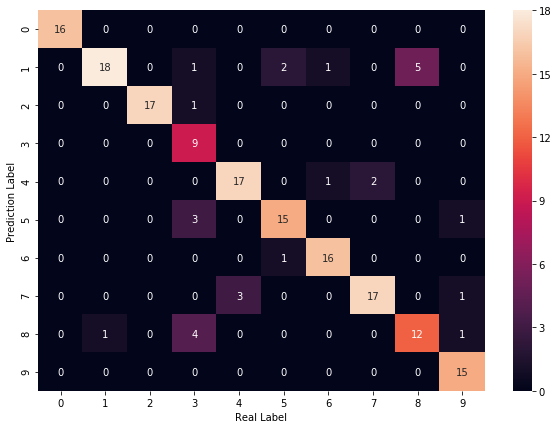

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9443413729128015

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9885503093293749

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1037 Total connections::1289
